# Prosjekt 1 TMA4215
### Simen Nygard  MTFYMA

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

import pandas as pd
from IPython.display import display, HTML

%matplotlib inline
rcParams.update({'axes.grid': True,'legend.fontsize': 18, 'legend.handlelength': 2, 
            'axes.labelsize':18,'axes.titlesize': 18, 'figure.figsize':(16,8)})

def oppgave3():
    maxN = 100
    N = np.arange(1, maxN + 1)
    data = np.empty((maxN, 2))

    for i, n in enumerate(N):
        A = np.triu(np.ones(n))
        invA = np.linalg.inv(A)
        
        for k in range(2):
            data[i, k] = np.prod(np.linalg.norm([A, invA], k + 1, axis=(1, 2)))
            
    fig, ax=plt.subplots(figsize=(16,8))
    lines = ax.plot(N, data)
    ax.update({'title':'Figur 1', 'xlabel': r'Matrisestørrelse $n$', 'ylabel':'Kondisjonstall '})
    plt.legend(lines, (r'$\kappa_1(A)$', r'$\kappa_2(A)$'), loc='best')
    plt.show()

def oppgave4():
    N=10
    l=[]
    for i in range(N):
        n = 20
        NEXPS = int(2E4)
        
        b = 2 * np.random.rand(n) - 1
        A = np.triu(np.ones(n))
        x = np.linalg.solve(A, b)

        IxI, IbI = np.linalg.norm([x, b], 2, axis=1)
        kappa2A = np.linalg.cond(A, 2)
        db = 0.2 * np.random.rand(n, NEXPS) - 0.1  
        dx=np.linalg.solve(A, db)                        #Solves NEXP systems by broadcasting
        IdxI, IdbI = np.linalg.norm([dx, db], 2, axis=1) #shape=(1,n,NEXPS)
        kappa_c = (IdxI / IxI) / (IdbI / IbI)

        kappa_est = np.amax(kappa_c)
        l.append({r'$\kappa_2(A)$':kappa2A, r'$\kappa_{est}(A)$' :kappa_est})
        
    data=pd.DataFrame(l)
    handle=data.to_html(classes='table table-striped table-bordered',index=True)
    display(HTML(handle))
    
    # print(IdxI, IdbI, sep='\n')
    
    #print(kappa_est, kappa2A)

## Oppgave 1.1

$\newcommand{\rank}[1]{ \mathcal{Rank} \left( #1 \right) }
\newcommand{\dimker}[1]{ \mathcal{dim \ Ker} \left( #1 \right) }
\newcommand{\norm}[1]{ \lVert #1 \rVert }
\newcommand{\abs}[1]{ \lvert #1 \rvert }
\newcommand{\tup}[1]{ \left( #1 \right) }
\newcommand{\defeq}{\mathrel{\mathop:}=}
$

[//]: # (Hacky kommentar)

La $u,v \in \mathbb{R}^n$ være kolonnevektorer. Da er ytreproduktet av de to vektorene en matrise $A \in \mathbb{R}^{n \times n}$ gitt ved 
\begin{equation}\label{eq:outerProd}
A= u \oplus v = uv^T
\end{equation}

Vi ønsker å finne 
\begin{equation}\label{eq:twoNorm}
\lVert A \rVert_2=\sqrt{\rho \left( A^TA \right)}=\sqrt{\rho \left( vu^Tuv^T \right)}=\norm{u}_2 \sqrt{\rho \left( vv^T \right)}
\end{equation}
der vi ser at $\rank{vv^T}=1$ som følge av at radene er innbyrdes proporsjonale:
\begin{equation}\label{eq:}
vv^T=
\begin{bmatrix}
    v_1 v^T    \\
    v_2 v^T    \\
    \vdots \\
    v_n v^T   
\end{bmatrix}
\end{equation}

Dette må nødvendigvis innebære at $\dimker{vv^T}=n-1$, slik at $vv^T$ har egenverdi $0$ med geometrisk multiplisitet $\gamma(0)=n-1$, som betyr at hvertfall $n-1$ av egenverdiene må være lik $0$.  Den siste egenverdien kan finnes ved å la $v$ være egenvektor:

$$vv^Tv=(v \cdot v) v= \norm{v}_2^2v$$    
slik at $\norm{v}_2^2>0$ vil være den siste distinkte egenverdien for $v\ne 0$. Ettersom normen i likning \eqref{eq:twoNorm} følger ved bruk av vanlig euklidsk vektornorm i det trivielle tilfellet, kan vi anta $v\ne 0$.
Ved å benytte at 
\begin{equation}\label{eq:trace}
    \mathcal{Trace}\left( vv^T \right)=\sum_{i=1}^{n} v_i^2=\sum_{i=1}^{n}\lambda_i=\norm{v}_2^2 
    = \underset{\lambda \in \sigma \tup{vv^T}}{\mathcal{max}}
\abs{\lambda}=\rho \left( vv^T \right)
\end{equation}
følger det fra likning \eqref{eq:twoNorm} at

\begin{equation}
\norm{A}_2=\norm{u}_2\norm{v}_2
\end{equation}





## Oppgave 1.2

For en symmetrisk matrise vil $A=A^T$ medføre at $\rho \tup{A^TA} =\rho\tup{A^2}=\rho^{\ 2}\tup{A}$, slik at 

\begin{equation}\label{eq:absLam}
\norm{A}_2=\sqrt{\rho \tup{A^TA}}=\abs{\rho \tup{A}}= \mathcal{max}_{\lambda \in \sigma\tup{A}} \abs{\lambda} \defeq \abs{\lambda_{max}}
\end{equation}

Siden $Ax=\lambda x$ er ekvivalent med $A^{-1}x=\frac{1}{\lambda}x$, er det klart at $1/\lambda \ne 0$ vil være en egenverdi av $A^{-1}$ for samme $x$ som er egenvektor av A. Siden $\tup{A^{-1}}^T=\tup{A^T}^{-1}=A^{-1}$ er
\begin{equation}\label{eq:invLam}
\norm{A^{-1}}_2=\abs{\rho \tup{A^{-1}} }=\underset{\lambda \in \sigma \tup{A^{-1}}}{\mathcal{max}}
\abs{\lambda}=\underset{\lambda \in \sigma \tup{A}}{\mathcal{max}} \left| \frac{1}{\lambda}\right|=\frac{1}{  \underset{\lambda \in \sigma \tup{A}}{\mathcal{min}}\abs{\lambda}} \defeq \frac{1}{\abs{\lambda_{min}}}
\end{equation}
Fra dette følger det at 
\begin{equation}\label{eq:kappa2}
\kappa_2 \tup{A}=\norm{A}_2 \norm{A^{-1}}_2=\left|\frac{\lambda_{max}}{\lambda_{min}} \right|
\end{equation}



## Oppgave 1.3

Vi betrakter matrisen $A \in \mathbb{R}^{n \times n}$
\begin{equation}\label{eq:upperA}
A=
\begin{bmatrix}
 &1         &  &               &                  & \\
 &0         &1 &               & {\huge \quad  1} & \\
 &          &0 &1              &                  & \\
 &{\huge 0} &  &\ddots         &\ddots            & \\ 
\end{bmatrix}
\end{equation}

$A$ har $n$ lineært uavhengige kolonner, slik at det eksisterer en $A^{-1}=\left[c_1 \dots c_n \right]$ som gir $AA^{-1}=\left[ A c_1 \dots A c_n \right]=I=\left[ e_1 \dots e_n \right]$. Ved å sammenlikne kolonnevektorer $Ac_k=e_k$ nedenfra og opp får vi

\begin{equation}\label{eq:colEq}
\begin{bmatrix}
 \sum_{i=1}^{n} \tup{c_k}_i    \\
  \\
 \vdots    \\
 \sum_{i=k}^{n}\tup{c_k}_i \\
  \vdots    \\
  \\
 \sum_{i=n}^{n}\tup{c_k}_i \\
\end{bmatrix}
 =
\begin{bmatrix}
    0    \\
    \vdots    \\
    0 \\
    1 \\
    0 \\ 
    \vdots    \\
    0
\end{bmatrix}
\end{equation}

Her er $\tup{c_k}_i$ element $a^{-1}_{ik}$, og vi ser at vi må ha $\tup{c_k}_n=\tup{c_k}_{n-1}=\dots=\tup{c_k}_{k+1}=0$.
$\tup{c_k}_k=1$, og for $k\ge 2$ gir raden over at $\tup{c_k}_{k-1}=-\tup{c_k}_k=-1$. Disse to elementene vil kanselere hverandre i de øvrige summene, slik at $\tup{c_k}_{k-2}=\dots=\tup{c_k}_1=0$. Av dette er det klart at $A^{-1}=\mathcal{bidiag_n} \tup{1,-1}$,  
der $1$ og $-1$  henholdsvis fyller hoveddiagonalen og diagonalen over.

Av diagonalelementene er det lett å se at $\sigma\tup{A}=\{1\}=\sigma \tup{A^{-1}}$. Følgelig må $\lambda_{max}=\lambda_{min}=1=\left| \frac{\large\lambda_{max}}{\large\lambda_{min}} \right|$.  
Videre er
$$\norm{A}_1=\underset{j}{\mathcal{max}} \sum_{i=1}^{n}\abs{a_{ij}}=n=\underset{i}{\mathcal{max}} \sum_{j=1}^{n}\abs{a_{ij}}=\norm{A}_{\infty}$$
og
$$\norm{A^{-1}}_1=\underset{j}{\mathcal{max}} \sum_{i=1}^{n}\abs{a_{ij}^{-1}}=2=\underset{i}{\mathcal{max}}\sum_{j=1}^{n}\abs{a_{ij}^{-1}}=\norm{A^{-1}}_{\infty}$$

slik at 
\begin{equation}\label{eq:kappas}
\kappa_1 \tup{A}=2n=\kappa_{\infty}\tup{A}
\end{equation}



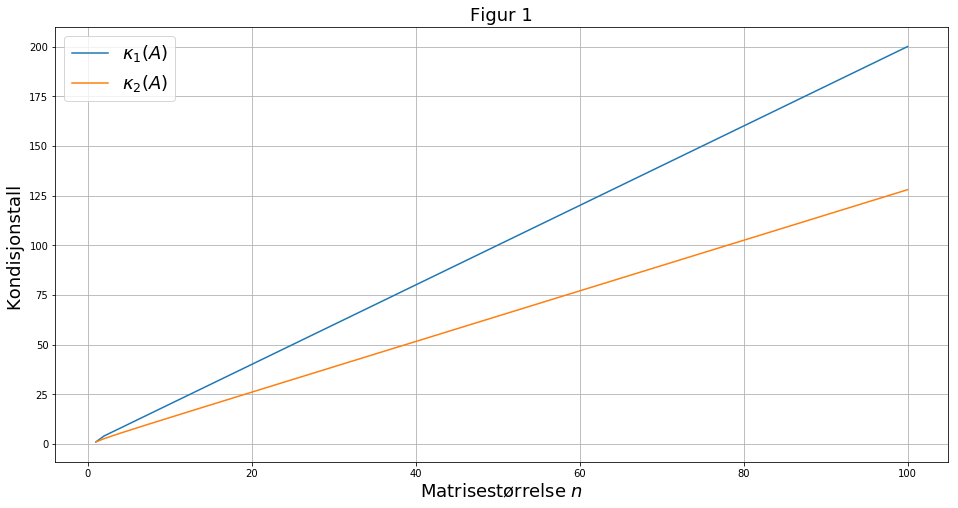

In [71]:
oppgave3()

Figur 1 viser utviklingen av $\kappa_1(A)$ og $\kappa_2(A)$ for ulike matrisestørrelser $n \in [1,100]$. Som forventet går $\kappa_1(A)$ i henhold til likning \eqref{eq:kappas}. $\kappa_2(A)$ følger samme trend som $\kappa_1(A)$, men kondisjonstallet er ca. $40$% lavere. Den lineære stigningen fraviker opplagt fra konstantverdien $1$ som likning \eqref{eq:kappa2} tilskriver en symmetrisk matrise.

## Oppgave 1.4

In [249]:
oppgave4()

,$\kappa_2(A)$,$\kappa_{est}(A)$
0,26.031192,1.573645
1,26.031192,1.301530
2,26.031192,1.619118
3,26.031192,1.237684
4,26.031192,1.201659
5,26.031192,1.400668
6,26.031192,1.633443
7,26.031192,1.334107
8,26.031192,1.170515
9,26.031192,1.170635


Den relative feilen i forward error har en øvre grense gitt ved 
\begin{equation}\label{eq:upperBoundA}
\frac{\norm{\delta x}_2}{\norm{x}_2} \le \frac{\kappa_2(A)}{1-\kappa_2(A) \frac{\norm{\delta A}_2}{\norm{A}_2}} \left( \frac{\norm{\delta b}_2}{\norm{b}_2}+\frac{\norm{\delta A}_2}{\norm{A}_2}   \right)
\end{equation}

som videre reduseres til ulikhet \eqref{eq:upperBound} i tilfellet $\delta A=0$:
\begin{equation}\label{eq:upperBound}
\frac{\norm{\delta x}_2}{\norm{x}_2} \le \kappa_2(A) \frac{\norm{\delta b}_2}{\norm{b}_2}
\end{equation}

Vi ser nærmere på dette forholdet ved å studere den ekvivalente ulikheten $\frac{ \norm{\delta x}_2 / \norm{x}_2}{\norm{\delta b}_2 / \norm{b}_2} \defeq \kappa_{est}(A) \le \kappa_2(A)$. Forholdet mellom relativ forward- og backward error er kjent som en error magnification factor, ettersom forholdet spår hvor mye $x$ endres som følge av perturbasjoner i $b$ for en fast matrise $A$. 
Tabellen viser $\kappa_{2}(A)$ og$\kappa_{est}(A)$ som resulterte fra 10 forskjellige simuleringer med $n=20$ og $NEXPS=2000$. Vi ser at $\kappa_{est}$ på det meste utgjør ca. $6$% av $\kappa_2(A)$, slik at ulikheten trygt kan sies å holde. Teorien forventer at $\kappa_2(A)$ vil være maksimumet av $\kappa_{est}$ over alle $b$. 